In [1]:
# Import required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_utilities as util
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
#df = pd.read_csv('Resources/six_month_data.csv')
df = pd.read_csv('Resources/six_month_dead_alive_data.csv')
#df = pd.read_csv('Resources/six_month_dead_depend_data.csv')
#df = pd.read_csv('Resources/six_month_alive_outcome_data.csv')
#df = pd.read_csv('Resources/cleaned_data_12-11.csv')


In [3]:
# View the data
df.head()

,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RSBP,RCONSC,RDEF1,RDEF2,...,DHAEMD,DTHROMB,DNOSTRK,DRSISC,DRSH,DRSUNK,DPE,DALIVE,CNTRYNUM,OCCODE
0,F,78,N,C,Y,Y,118,F,Y,Y,...,N,N,N,N,N,U,N,N,14,1
1,F,65,N,C,Y,N,170,F,Y,Y,...,N,N,N,N,N,U,N,Y,27,1
2,M,54,N,C,Y,Y,153,F,Y,Y,...,N,N,N,N,N,U,N,Y,27,1
3,F,77,N,C,Y,N,142,F,Y,Y,...,N,N,N,N,N,U,N,Y,27,1
4,F,77,N,C,Y,Y,130,F,Y,N,...,N,N,N,N,N,U,N,Y,27,1


In [4]:
# Generate models for the dataset and find the best one
model = util.stroke_model_generator(df.copy(), 'OCCODE')

LogisticRegression()
Mean Squared Error: 0.13818027210884354
R-squared: 0.8594280312730891
Balanced Accuracy: 0.7213824728260869
Accuracy: 0.8618197278911565
Cross Val Score: 0.17851527905379128

SVC()
Mean Squared Error: 0.14668367346938777
R-squared: 0.8507774485822023
Balanced Accuracy: 0.6933933423913043
Accuracy: 0.8533163265306123
Cross Val Score: 0.0961030549830739

KNeighborsClassifier()
Mean Squared Error: 0.18154761904761904
R-squared: 0.8153100595495663
Balanced Accuracy: 0.6548997961956522
Accuracy: 0.8184523809523809
Cross Val Score: -0.15090517633815864

DecisionTreeClassifier()
Mean Squared Error: 0.1917517006802721
R-squared: 0.804929360320502
Balanced Accuracy: 0.711812160326087
Accuracy: 0.8082482993197279
Cross Val Score: -0.21844411888858534

RandomForestClassifier()
Mean Squared Error: 0.1296768707482993
R-squared: 0.8680786139639758
Balanced Accuracy: 0.7296365489130434
Accuracy: 0.8703231292517006
Cross Val Score: 0.20355790479974184

ExtraTreesClassifier()
Mean 

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [6]:
# Define features and target
X = df.drop('OCCODE', axis=1)
y = df['OCCODE']

In [7]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Encode the data
le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [9]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [10]:
# Transform the training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Define the parameters
param_grid = {
    #"loss":["log_loss", "exponential"],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth":[3, 5, 8],
    #"max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "squared_error"],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[10, 50, 200]
    }

In [12]:
# Create the GridSearchCV model
grid_tuned_model = GradientBoostingClassifier()
grid_clf = GridSearchCV(grid_tuned_model, param_grid, verbose=3)

In [13]:
# Fit the GridSearchCV model
grid_clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=0.782 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=0.782 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.75;, score=0.782 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.75;, score=0.782 total time=   0.

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8], 'n_estimators': [10, 50, 200],
                         'subsample': [0.5, 0.75, 1.0]},
             verbose=3)

In [14]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}


In [15]:
# Get the score for the GridSearchCV model
grid_clf.score(X_test_scaled, y_test)

0.8724489795918368

In [16]:
# Check the metrics for the GridSearchCV model
util.check_metrics(X_test_scaled, y_test, grid_clf.best_estimator_)

Mean Squared Error: 0.12755102040816327
R-squared: 0.8702412596366976
Balanced Accuracy: 0.739453125
Accuracy: 0.8724489795918368
Cross Val Score: 0.15093031725142572



0.8702412596366976

<Axes: >

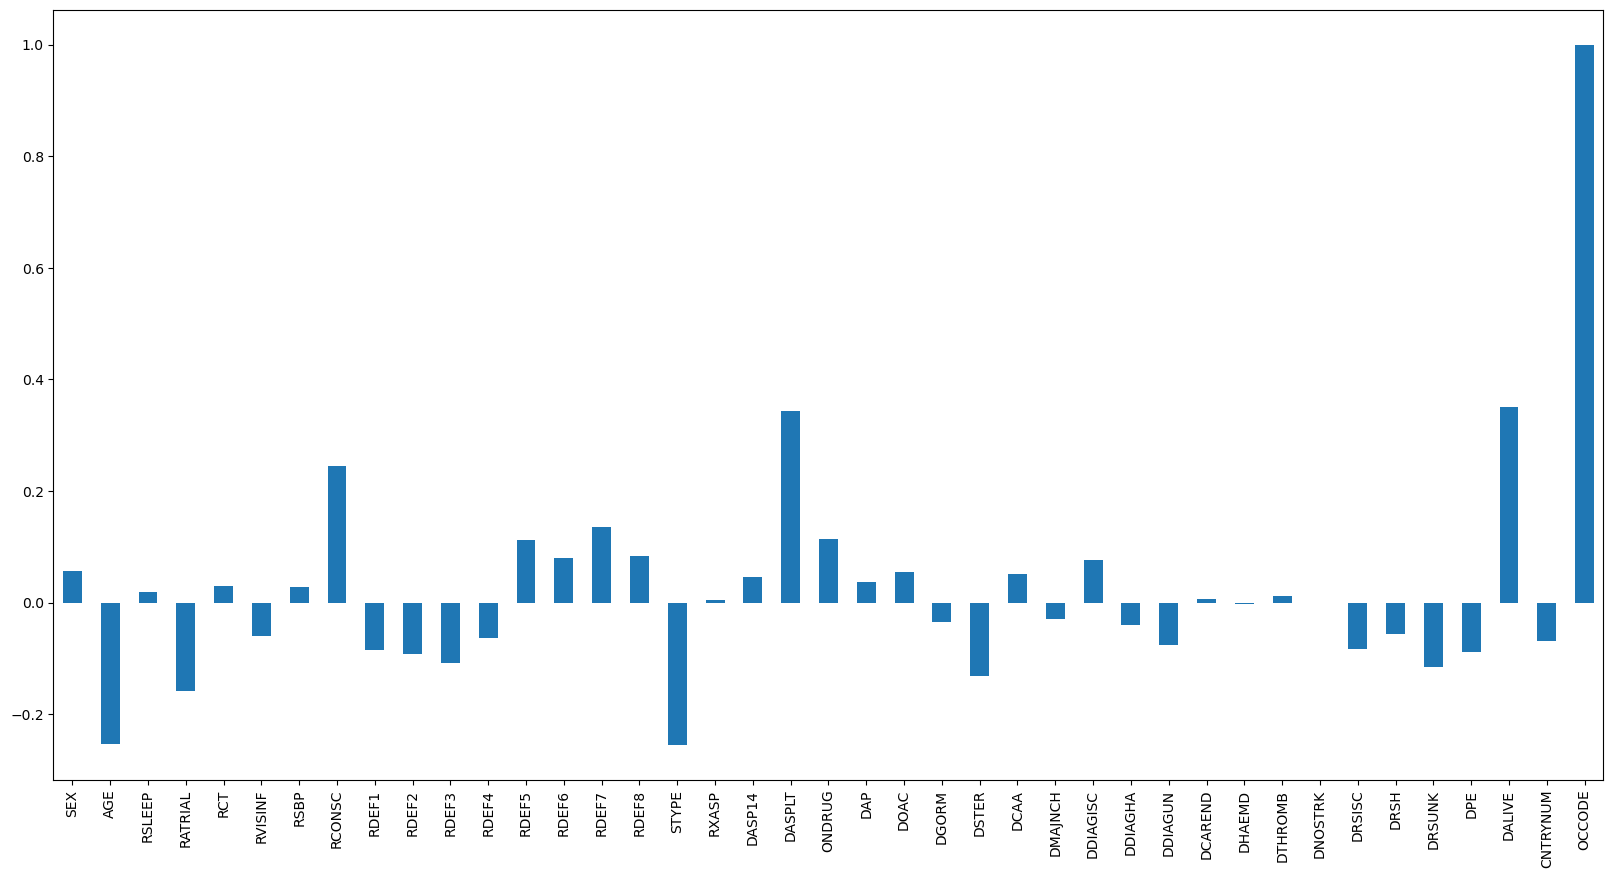

In [19]:
# Plot the feature importance
df = df.apply(le.fit_transform)
df_scaled = X_scaler.fit(df).transform(df)
scaled_df = pd.DataFrame(df_scaled, columns=df.columns)
df_corr = scaled_df.corr()
df_corr['OCCODE'].plot(kind='bar', figsize=(20, 10))